In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

from ipywidgets import interact, SelectionSlider, IntSlider

In [2]:
import metadata_util
spec_names = metadata_util.read_spec_names()
phy_names = metadata_util.get_phy_names()
jval_names = metadata_util.read_jval_names()

In [3]:
ds = xr.open_dataset('./KPP_fields_100.nc')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Dimensions without coordinates: lat, lev, lon, nphotol, nphy, nreact, nspec
Data variables:
    C_before  (lev, lat, lon, nspec) float64 ...
    C_after   (lev, lat, lon, nspec) float64 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 ...
    PHY       (lev, lat, lon, nphy) float64 ...
    RCONST    (lev, lat, lon, nreact) float64 ...

In [4]:
ds.coords['nspec'] = spec_names
ds.coords['nphotol'] = jval_names
ds.coords['nphy'] = phy_names
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Coordinates:
  * nspec     (nspec) <U8 'CH2I2' 'CH2ICl' 'CH2IBr' 'AERI' 'CO2' 'INDIOL' ...
  * nphotol   (nphotol) object '1/O2/O2' '2/O3/O3' '3/O3/O3(1D)' '4/H2O/H2O' ...
  * nphy      (nphy) <U6 'TEMP' 'PRESS' 'NUMDEN' 'H2O'
Dimensions without coordinates: lat, lev, lon, nreact
Data variables:
    C_before  (lev, lat, lon, nspec) float64 ...
    C_after   (lev, lat, lon, nspec) float64 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 ...
    PHY       (lev, lat, lon, nphy) float64 ...
    RCONST    (lev, lat, lon, nreact) float64 ...

In [5]:
@interact(var=SelectionSlider(options=spec_names, continuous_update=False),
          l=IntSlider(options=range(72), continuous_update=False))
def plot_spec(var, l):
    ds['C_before'].sel(nspec=var)[l].plot()

interactive(children=(SelectionSlider(continuous_update=False, description='var', options=('CH2I2', 'CH2ICl', …

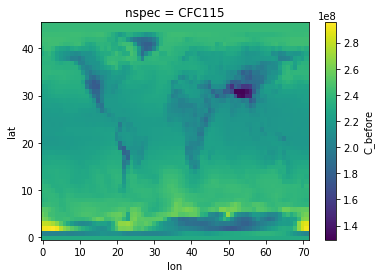

In [6]:
plot_spec('CFC115', 0)

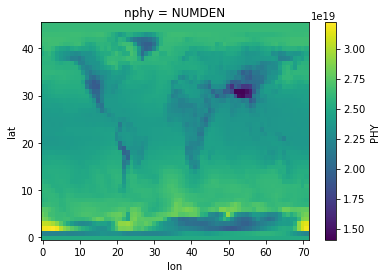

In [7]:
ds['PHY'].sel(nphy='NUMDEN')[0].plot()

In [8]:
@interact(var=SelectionSlider(options=jval_names, continuous_update=False),
          l=IntSlider(options=range(72), continuous_update=False))
def plot_spec(var, l):
    ds['PHOTOL'].sel(nphotol=var)[l].plot()

interactive(children=(SelectionSlider(continuous_update=False, description='var', options=('1/O2/O2', '2/O3/O3…